In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Gym tracker/Data/squat_accel_mother_data/Squa_mother_49.csv')

In [ ]:
df.head()

,time,ax,ay,az,a_mag
0,0.041470,4.666602,1.195215,8.616554,9.871713
1,0.044009,4.676174,1.214357,8.602198,9.866056
2,0.046548,4.695914,1.185644,8.616554,9.884451
3,0.049087,4.681558,1.185644,8.621340,9.881813
4,0.051624,4.729414,1.180858,8.597412,9.883182


Text(0.5, 1.0, 'Magnitude of Acceleration with Time.')

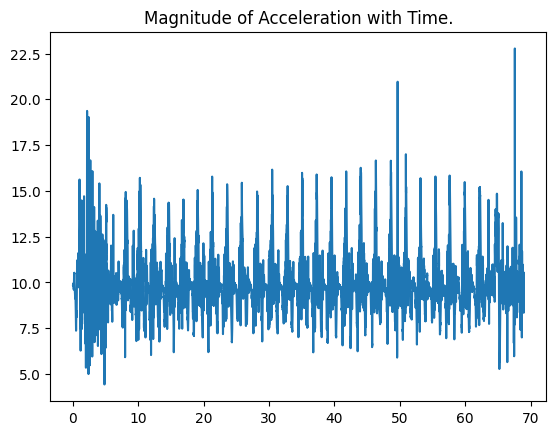

In [ ]:
plt.plot(df.time, df.a_mag)
plt.title('Magnitude of Acceleration with Time.') # via acceleromemter on the Oneplus 11R 5G

In [ ]:
time = df['time'].values
mask = (time>= 3) & (time <= time[-1] -2) # removes first and last second
df = df[mask].reset_index(drop=True)

Text(0.5, 1.0, 'Magnitude of Acceleration with Time with first three seconds & last two seconds removed')

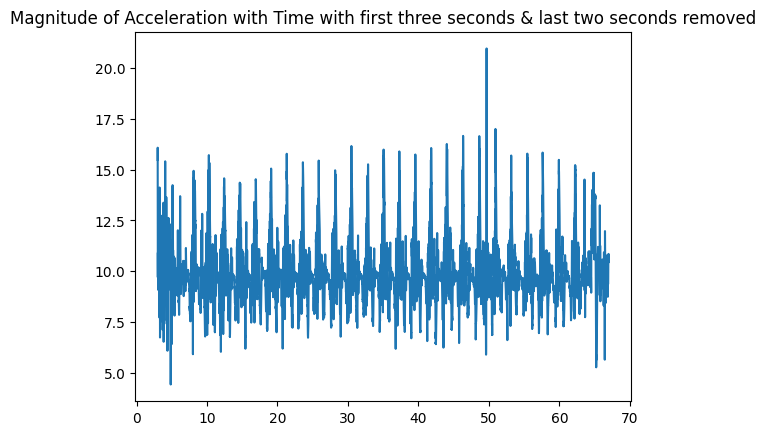

In [ ]:
plt.plot(df.time, df.a_mag)
plt.title('Magnitude of Acceleration with Time with first three seconds & last two seconds removed')

In [ ]:
window = 29
a_smooth = np.convolve(df.a_mag, np.ones(window)/window, mode = 'same')

Text(0.5, 1.0, 'Magnitude of Smoothened Acceleration with Time.')

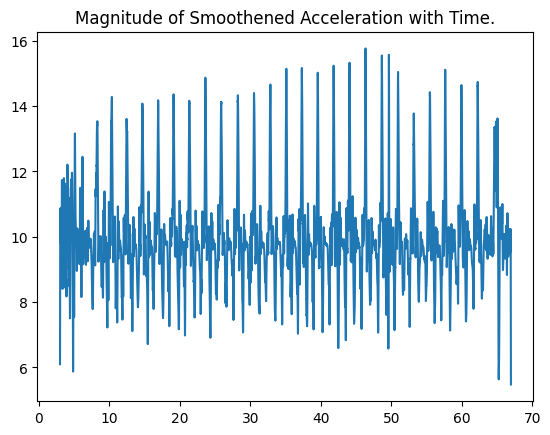

In [ ]:
plt.plot(df.time, a_smooth)
plt.title('Magnitude of Smoothened Acceleration with Time.')

In [ ]:
from scipy.signal import find_peaks
valleys,_ = find_peaks(-a_smooth, distance = 10, height = -(8.0), prominence = 5.4) # peaks to valleys with -ve, #NOTE the height parameter should be changed to something adaptive to user, staying to fixed value for now for simplicity
print(valleys)
print(f"number of reps = {len(valleys)}")

[  730  2644  3195  4039  4904  6108  6983  7527  8403  9693 10228 11152
 12413 13296 14169 14672 15547 16847 17775 18347 18694 19539 20933 21796
 22686]
number of reps = 25


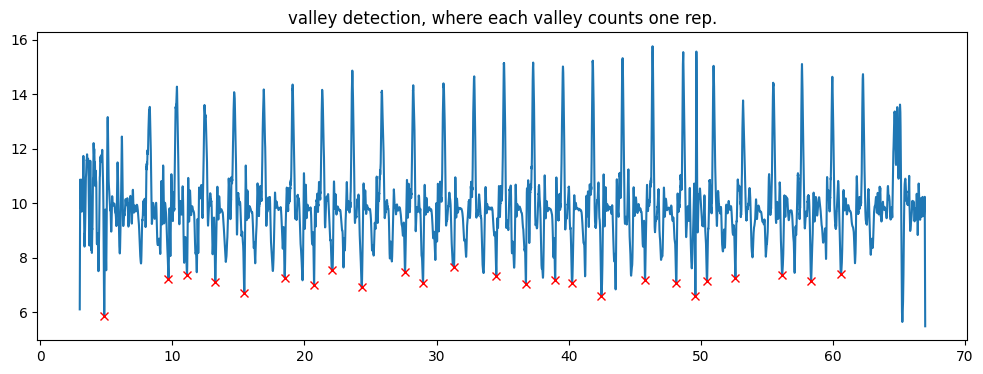

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df.time, a_smooth)
plt.plot(df.time[valleys], a_smooth[valleys], 'rx')
plt.title("valley detection, where each valley counts one rep.")
plt.show()

In [ ]:
#next -> finding rep duration then depth
#then ML for rep quality, smoothness, fatigue

In [ ]:
print(valleys)
time_stamp = df.time[valleys]
time_intervals = []
for i in range(len(time_stamp)):
  if i == 0:
    time_intervals.append(time_stamp.iloc[i])
  else:
    time_intervals.append(time_stamp.iloc[i] - time_stamp.iloc[i-1])
print(time_intervals)

[  730  2644  3195  4039  4904  6108  6983  7527  8403  9693 10228 11152
 12413 13296 14169 14672 15547 16847 17775 18347 18694 19539 20933 21796
 22686]
[np.float64(4.855576617), np.float64(4.859829219000001), np.float64(1.399307133999999), np.float64(2.1427812500000005), np.float64(2.1963204199999993), np.float64(3.0573378600000023), np.float64(2.221712499999999), np.float64(1.38110438), np.float64(2.224388640000001), np.float64(3.2752319799999974), np.float64(1.3586498500000026), np.float64(2.3459128599999985), np.float64(3.2019332799999987), np.float64(2.242121879999999), np.float64(2.216480670000003), np.float64(1.2773176600000014), np.float64(2.2214472900000004), np.float64(3.301085520000001), np.float64(2.3560588100000004), np.float64(1.4526039499999968), np.float64(0.8810163099999997), np.float64(2.1452314), np.float64(3.5395575800000003), np.float64(2.191514120000001), np.float64(2.2596804100000014)]


In [ ]:
print(df.time[valleys])

730       4.855577
2644      9.715406
3195     11.114713
4039     13.257494
4904     15.453815
6108     18.511153
6983     20.732865
7527     22.113969
8403     24.338358
9693     27.613590
10228    28.972240
11152    31.318153
12413    34.520086
13296    36.762208
14169    38.978689
14672    40.256006
15547    42.477453
16847    45.778539
17775    48.134598
18347    49.587202
18694    50.468218
19539    52.613449
20933    56.153007
21796    58.344521
22686    60.604202
Name: time, dtype: float64


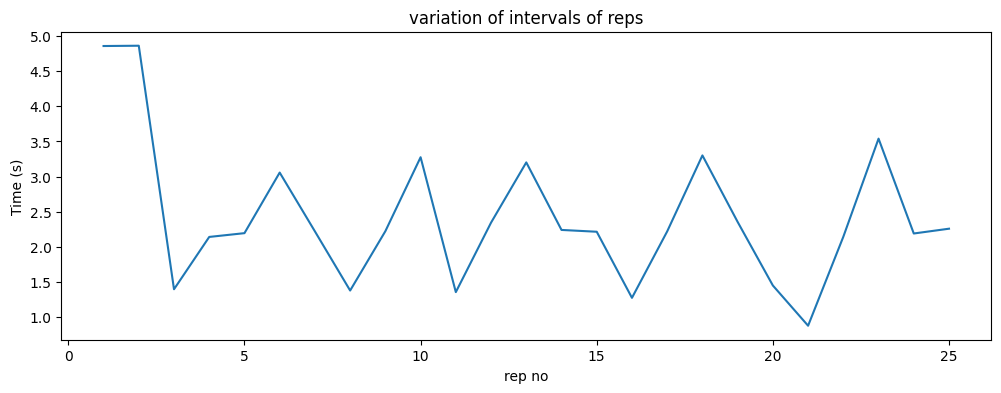

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(range(1,len(time_intervals)+1), time_intervals)
plt.title('variation of intervals of reps')
plt.ylabel('Time (s)')
plt.xlabel('rep no')
plt.show()


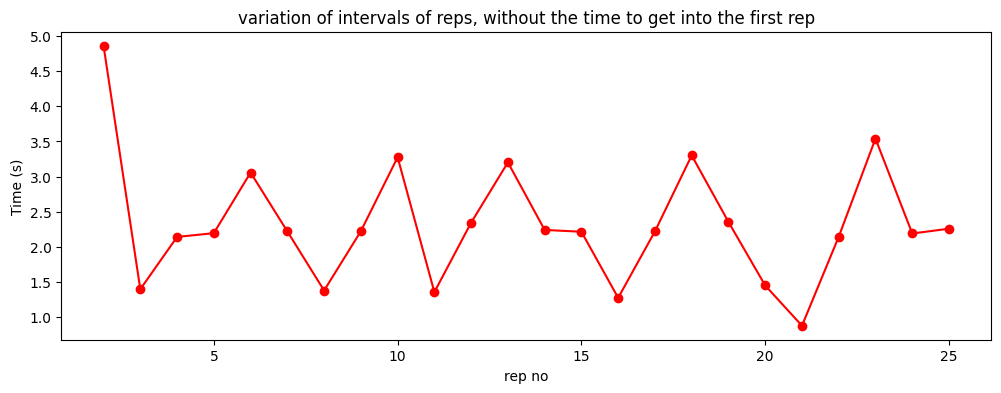

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(range(2,(len(time_intervals)+1)), time_intervals[1:], marker = 'o', color = 'r')
plt.title('variation of intervals of reps, without the time to get into the first rep')
plt.ylabel('Time (s)')
plt.xlabel('rep no')
plt.show()

In [ ]:
time_intervals_list = list(map(lambda x: float(x), time_intervals)) #converting values to python list type
print(time_intervals_list)

[4.855576617, 4.859829219000001, 1.399307133999999, 2.1427812500000005, 2.1963204199999993, 3.0573378600000023, 2.221712499999999, 1.38110438, 2.224388640000001, 3.2752319799999974, 1.3586498500000026, 2.3459128599999985, 3.2019332799999987, 2.242121879999999, 2.216480670000003, 1.2773176600000014, 2.2214472900000004, 3.301085520000001, 2.3560588100000004, 1.4526039499999968, 0.8810163099999997, 2.1452314, 3.5395575800000003, 2.191514120000001, 2.2596804100000014]


In [ ]:
# depth calculation of each rep

[  730  2644  3195  4039  4904  6108  6983  7527  8403  9693 10228 11152
 12413 13296 14169 14672 15547 16847 17775 18347 18694 19539 20933 21796
 22686]


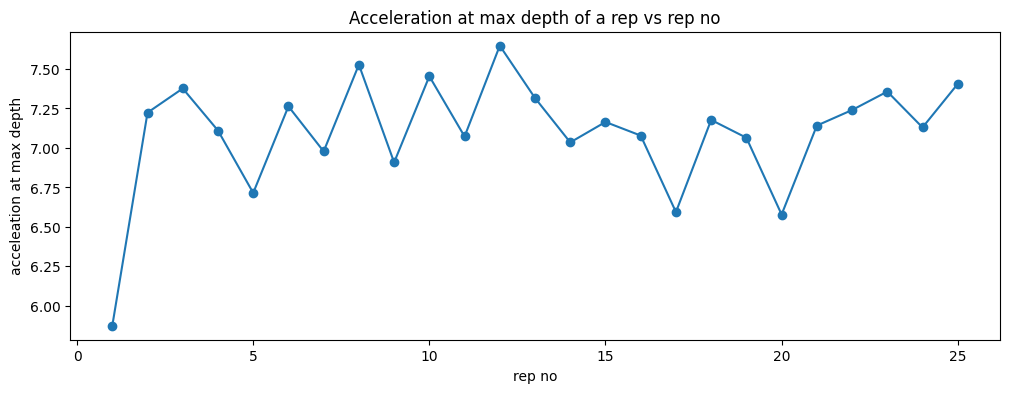

In [ ]:
#graph of acceleation vs rep no
print(valleys)
rep_depth = a_smooth[valleys]
plt.figure(figsize = (12,4))
plt.plot(range(1,len(rep_depth)+1), rep_depth, marker = 'o')
plt.title("Acceleration at max depth of a rep vs rep no")
plt.xlabel('rep no')
plt.ylabel("acceleation at max depth")
plt.show()

In [ ]:
df.head()

,time,ax,ay,az,a_mag
0,3.002091,13.764712,-6.690930,-2.281556,15.473893
1,3.004636,14.085949,-7.088737,-3.133999,16.077503
2,3.007181,13.372290,-7.337591,-3.167499,15.578556
3,3.009726,11.777473,-7.050452,-2.315056,13.920389
4,3.012271,10.518250,-6.690930,-1.759921,12.589657


In [ ]:
print(time_intervals_list)
print(rep_depth)
rep_no = list(range(1, len(rep_depth) +1))
print(rep_no)
rep_time = time_stamp # for easier intuition
print(len(time_intervals_list))

[4.855576617, 4.859829219000001, 1.399307133999999, 2.1427812500000005, 2.1963204199999993, 3.0573378600000023, 2.221712499999999, 1.38110438, 2.224388640000001, 3.2752319799999974, 1.3586498500000026, 2.3459128599999985, 3.2019332799999987, 2.242121879999999, 2.216480670000003, 1.2773176600000014, 2.2214472900000004, 3.301085520000001, 2.3560588100000004, 1.4526039499999968, 0.8810163099999997, 2.1452314, 3.5395575800000003, 2.191514120000001, 2.2596804100000014]
[5.87406423 7.22341995 7.37640708 7.11004499 6.71507845 7.26312865
 6.97797137 7.52717706 6.90820753 7.45378698 7.07243559 7.64712509
 7.31589516 7.03502474 7.16420025 7.0781334  6.59373883 7.17723092
 7.06436068 6.57817346 7.14137315 7.23993546 7.35669611 7.1295793
 7.40536013]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
25


In [ ]:
#finding peaks of a_smooth
peaks,_ = find_peaks(a_smooth, distance = 100, height = (7.0), prominence = 5.4)
print(peaks)
print(f"number of peaks = {len(peaks)}")
print(len(peaks), len(valleys))

[  413  2086  2896  3718  4601  5484  6344  7225  8123  9006  9939 10840
 11757 12646 13513 14400 15289 16179 17071 17986 18377 18890 19769 20667
 21525 22429 23343 24446]
number of peaks = 28
28 25


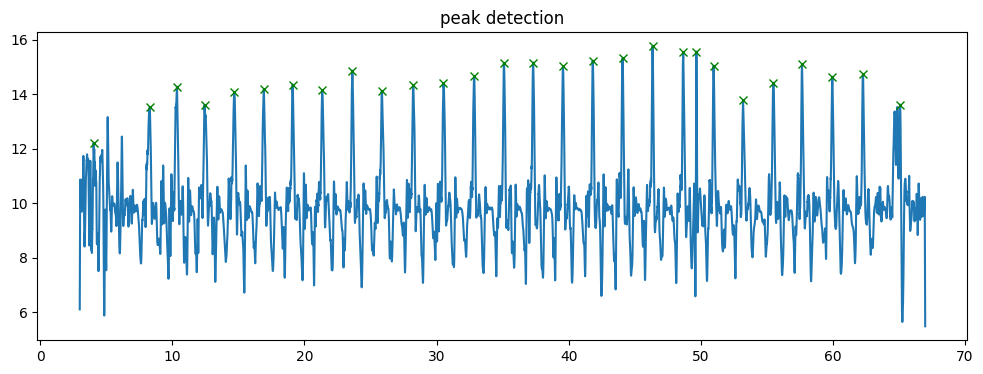

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df.time, a_smooth)
plt.plot(df.time[peaks], a_smooth[peaks], 'gx')
plt.title("peak detection")
plt.show()

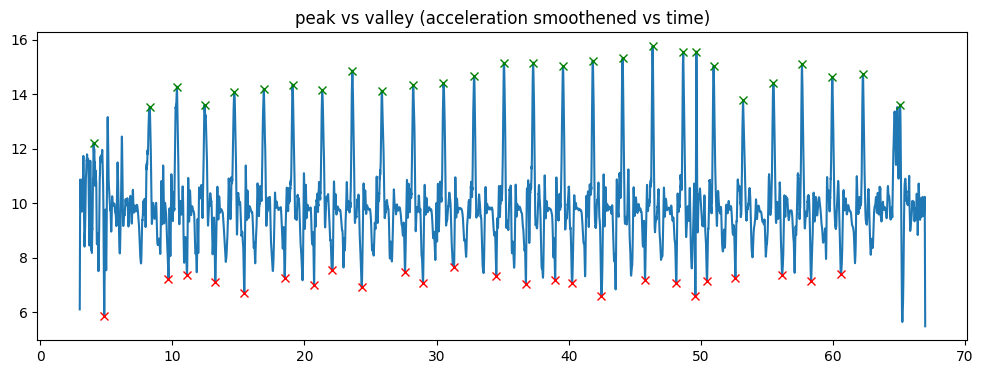

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df.time, a_smooth)
plt.plot(df.time[valleys], a_smooth[valleys], 'rx')
plt.plot(df.time[peaks], a_smooth[peaks], 'gx')
plt.title("peak vs valley (acceleration smoothened vs time)")
plt.show()

In [ ]:
valley_a = a_smooth[valleys]
peak_a = a_smooth[peaks]

range_a = []

for i in range(len(valley_a) -1): # last valley corresponds to no peak
    range_a.append(peak_a[i+1] - valley_a[i]) # peak - valley before | valleys are when the user is decelerating towards the ground and peaks are when user is shooting up

range_a = list(map(float, range_a))
print(range_a)

[7.662142330517239, 7.054863852482758, 6.229363047275863, 6.964928472137931, 7.460624861517241, 7.093630942793105, 7.183007067793104, 7.339718067551729, 7.219628584931031, 6.875684878413793, 7.325949480655175, 7.009053167344825, 7.823215358931036, 8.127909949344826, 7.854375706931033, 8.156197284931034, 8.73039001875862, 8.583867103206895, 8.481498334275862, 8.988531944172415, 7.901142970517237, 6.532276991482761, 7.065096857379312, 7.979602754827585]


In [ ]:
set_df2 = pd.DataFrame({
    # metadata
    "set_id": 2,
    "set_size": len(rep_no),
    "exercise": "squat",
    "age": 49,
    "date": pd.to_datetime('24/2/2026', dayfirst = True),
    # rep features
    "rep_in_set": rep_no[1:-1],                  # 2 to 7
    "rep_time": rep_time[1:-1],                  # times of reps 2 to 8
    "rep_interval": time_intervals_list[1:-1],   # true intervals only (2-7)
    "rep_depth": rep_depth[1:-1],                # depths of reps 2 to 7
    "range_a":range_a[1:]                        # peak - valley before difference gives 2 to 7
}).reset_index(drop = True)

# removed last rep to ensure range  corresponds to others

set_df2.head(100)

# rows = reps, columns = rep features

,set_id,set_size,exercise,age,date,rep_in_set,rep_time,rep_interval,rep_depth,range_a
0,2,25,squat,49,2026-02-24,2,9.715406,4.859829,7.223420,7.054864
1,2,25,squat,49,2026-02-24,3,11.114713,1.399307,7.376407,6.229363
2,2,25,squat,49,2026-02-24,4,13.257494,2.142781,7.110045,6.964928
3,2,25,squat,49,2026-02-24,5,15.453815,2.196320,6.715078,7.460625
4,2,25,squat,49,2026-02-24,6,18.511153,3.057338,7.263129,7.093631
5,2,25,squat,49,2026-02-24,7,20.732865,2.221712,6.977971,7.183007
6,2,25,squat,49,2026-02-24,8,22.113969,1.381104,7.527177,7.339718
7,2,25,squat,49,2026-02-24,9,24.338358,2.224389,6.908208,7.219629
8,2,25,squat,49,2026-02-24,10,27.613590,3.275232,7.453787,6.875685
9,2,25,squat,49,2026-02-24,11,28.972240,1.358650,7.072436,7.325949


In [ ]:
#function which does all this